## Module 3: Exploratory data analysis  

### Lesson 3: Relationships Between Features

### Part 3.3.1  : How are features in our data related to each other? - Part 1

- The relationship between numerical attributes is computed using metrics like covariance, correlation and regression.
- Using **covariance**, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.
- On the other hand, **correlation** measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. It is dimensionless - *i.e.* it is not measured in any units.
- **Regression** gives the algebraic relationship between the variables. It is a polynomial in the form of $Y = f(X)$, where $Y$ is a dependent variable and $X$ is a list of independent variables influencing $Y$.
- In data analytics, we focus on understanding the correlation between the variables, and in machine learning we explore more about regression as a predictive model building tool.


- If X and Y are two numerical variables, then the correlation coefficient is given as:

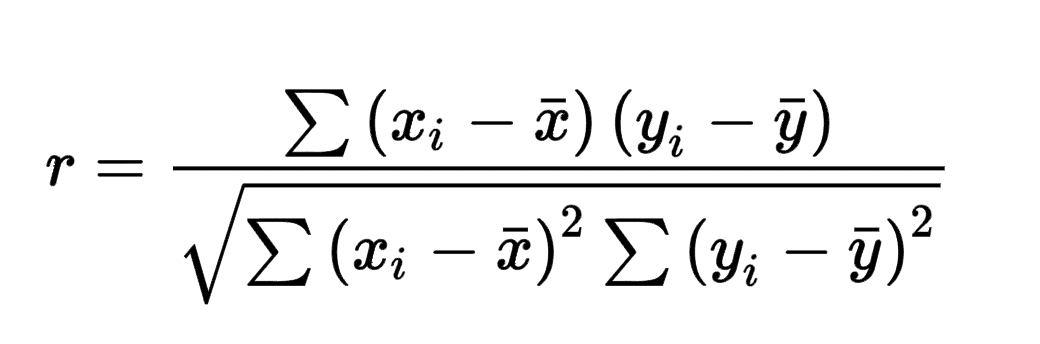

$r$ = correlation coefficient

$x_i$ = values of the variable $x$

$\bar{x}$ = mean of the variable $x$

$y_i$ = value of the variable $y$

$\bar{y}$ = mean of the variable $y$

***NOTE:***
- The value of correlation coefficient ranges from -1 to +1
- Zero represents no correlation
- Larger values (without the sign) indicate the strength of correlation, with 1 being perfect correlation
- The sign indicates the direction of correlation (positive or negaive)

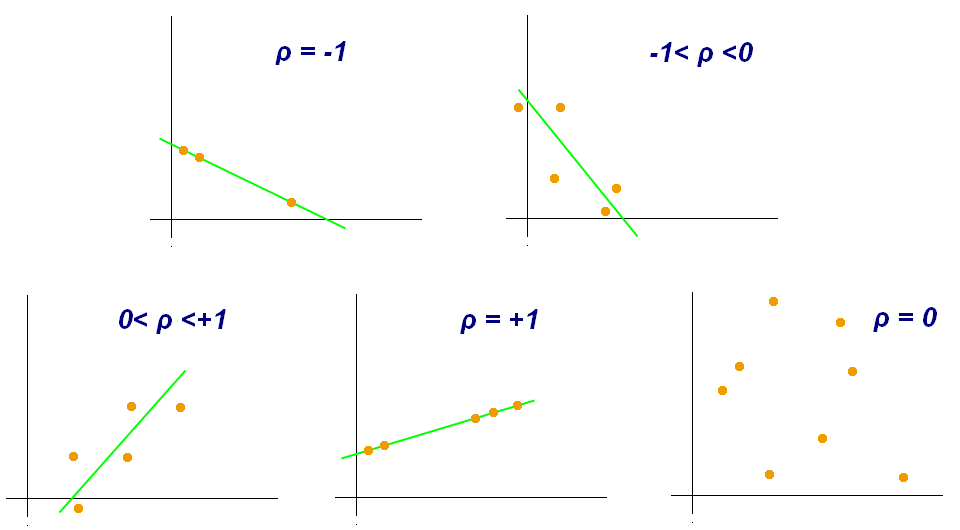

**Let us understand the relationship between the numerical attributes of POS data**

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data file
pos_data = pd.read_csv('POS_CleanData.csv')

In [3]:
pos_data.head()   

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0


**We can compute the correlation coefficient between any two variables using a numpy method corrcoef()**

In [4]:
# correlation between page traffic and revenue
np.corrcoef(pos_data['Page_traffic'],pos_data['Revenue($)'])

array([[1.        , 0.81824515],
       [0.81824515, 1.        ]])

***Inference:*** 
- The correlation coefficient between Page traffic and Revenue is 0.82, which is a high degree of positive correlation.
- That is, as the number of visitors to the webpage of the product got increased, the sales also got increased.

**We can compute the correlation coefficient between all numerical variables in the dataframe a pandas method corr()**

In [5]:
# table of all correlation coefficients
cc = pos_data.corr()
cc

,Revenue($),Units_sold,Page_traffic
Revenue($),1.000000,0.909638,0.818245
Units_sold,0.909638,1.000000,0.864321
Page_traffic,0.818245,0.864321,1.000000


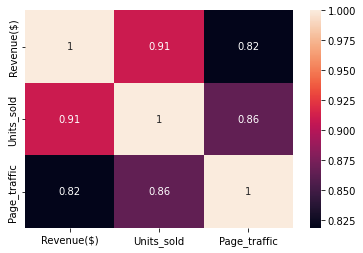

In [6]:
# heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(cc, annot = True)
plt.show()

***Explanation:***
- The heatmap is a $n \times n$ symmetric matrix showing pairwise correlation between n attributes. 
- The principal diagonal of the matrix will always have 1, because it shows the correlation of an attribute with itself.
- There is a high positive correlation between revenue and page traffic: 0.82. 
- Similarly, there is a high positive correlation between revenue and units sold - this is not surprising because  as the total number of units sold increases, the revenue also increases.

### Part 3.3.2  : How are features in our data related to each other? - Part 2
- In this lecture, we will visualize how the features are related to each other using scatter plot, regplot etc.


#### Scatter plot
- It is a type of data visualization that displays individual data points as dots on a two-dimensional plane.
- It is useful for visualizing the relationship between two numeric variables and identifying patterns, clusters, or trends in the data.


**The Seaborn package offers interesting themes and styles to make our graphs more appealing**

In [7]:
# set theme
sns.set_theme(style="ticks", font_scale=1.25)
sns.set_palette("Set2")
sns.set_context("notebook")
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Scatter plot between Units sold and Revenue')

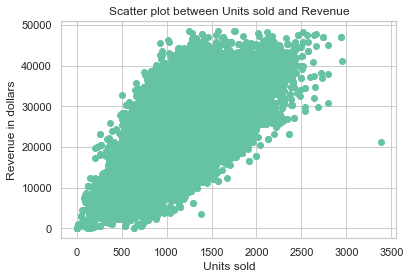

In [8]:
# scatter plot of units sold vs revenue
plt.figure(figsize = (6,4))
plt.scatter(x = 'Units_sold',y = 'Revenue($)',data = pos_data)

#setting x, y axis labels
plt.xlabel('Units sold')
plt.ylabel('Revenue in dollars')

#setting title
plt.title('Scatter plot between Units sold and Revenue')

**We can observe from above plot that revenue increases as the units sold increases.**

**Let us now visualize the relationship between page traffic and the revenue**

Text(0.5, 1.0, 'Scatter plot between Page_traffic and Revenue')

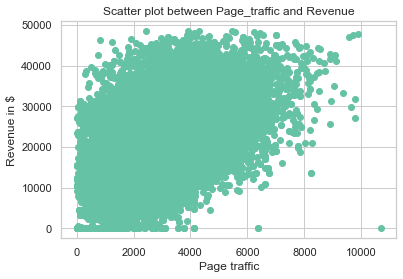

In [9]:
# scatter plot of page traffic vs revenue
plt.figure(figsize = (6,4))
plt.scatter(x = 'Page_traffic',y='Revenue($)',data=pos_data)

#setting x, y axis labels
plt.xlabel('Page traffic')
plt.ylabel('Revenue in $')

#setting title
plt.title('Scatter plot between Page_traffic and Revenue')

***Inference:***
- Though there is a positive correlation between page traffic and the revenue, the spread is more.
- We have seen in our earlier lessons that there are many records (or days) in which the page traffic (number of visitors to the website) is zero. This is the reason where we can see a dense area in the plot where page traffic is zero. 

#### Regplot
- The `regplot()` function in Seaborn is used to create scatter plots with a fitted regression line. 
- It allows us to visualize the linear relationship between two variables while also displaying a regression line that represents the best-fit linear model. 
- This can help you understand the trend and strength of the relationship between the variables.

<Axes: xlabel='Units_sold', ylabel='Revenue($)'>

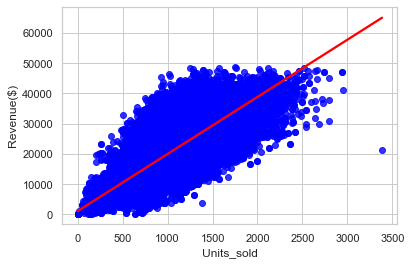

In [10]:
# regplot
plt.figure(figsize = (6,4))
sns.regplot(x = 'Units_sold',y = 'Revenue($)',data = pos_data, \
            scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})

#### Pairplot
- The pairplot function in seaborn is a powerful tool for creating a matrix of scatter plots that visualize pairwise relationships in a dataset. 
- It is particularly useful when you want to quickly understand the interactions between multiple variables in a dataset. 
- Each scatter plot in the matrix shows the relationship between two variables, and the diagonal plots display the distribution of each variable.

<Figure size 288x288 with 0 Axes>

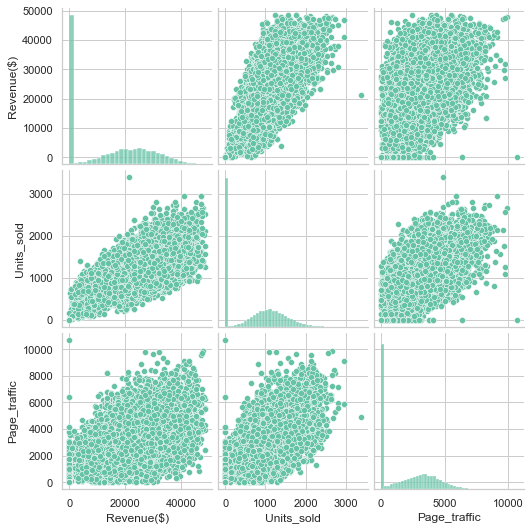

In [11]:
# plotting pairplot

plt.figure(figsize = (4,4))
sns.pairplot(data = pos_data)

**This very useful plot type allows us to explore pairwise relationships between many variables as well as the distributions of individual variables in a single chart.**

### Part 3.3.3  : Visualizing categorical features

#### Barplot
- A bar plot is a plot that presents categorical data with rectangular bars with lengths (or heights) proportional to the counts that they represent
- A bar plot is used to represent the frequency distribution of categorical variables
- A bar chart makes it easy to compare sets of data between different groups

In [12]:
pos_data.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0


#### How much revenue did each sector generate?

In [13]:
# find the total revenue by sector
rev_sector = pos_data.groupby('Sector')['Revenue($)'].sum().reset_index()
rev_sector

,Sector,Revenue($)
0,Beauty and Personal Care,133734179
1,Fabric Care,220755928
2,Oral Care,92021092


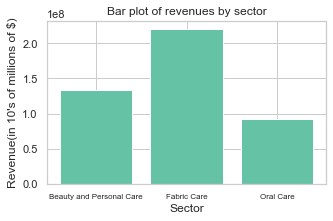

In [14]:
# plot the bar graph
plt.figure(figsize = (5,3))
plt.bar(rev_sector['Sector'],rev_sector['Revenue($)'])
plt.xticks(fontsize = 8)  # Specify the font size
plt.xlabel('Sector')
plt.ylabel("Revenue(in 10's of millions of $)")
plt.title('Bar plot of revenues by sector')
plt.show()

**We can see that *Fabric Care* sector has the highest revenue**

#### How much revenue did each category generate?

In [15]:
# revenue by category
rev_cat = pos_data.groupby('Category')['Revenue($)'].sum().reset_index()
rev_cat.head()

,Category,Revenue($)
0,Fabric Softeners,76894508
1,Haircare,51179827
2,Laundry Detergents,143861420
3,Mouthwash,18449428
4,Skincare,82554352


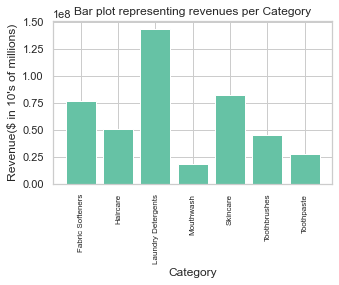

In [16]:
# plot the bar graph
plt.figure(figsize=(5,3))
plt.bar(rev_cat['Category'],rev_cat['Revenue($)'])
# Rotate x-axis labels
plt.xticks(fontsize=8,rotation=90)  # Specify the rotation angle (in degrees)
plt.xlabel('Category')
plt.ylabel("Revenue($ in 10's of millions)")
plt.title('Bar plot representing revenues per Category')
plt.show()

**We can see that the category *Laundry Detergents* has the highest revenue**

#### Countplot
- A countplot is a Seaborn-equivalent of barplot, but with additional features. 
- It is specifically designed for visualizing the count of occurrences of items in a categorical variable. 
- The countplot function creates a bar plot where the height of each bar represents the count of observations in each category.

#### How much revenue did each brand generate?

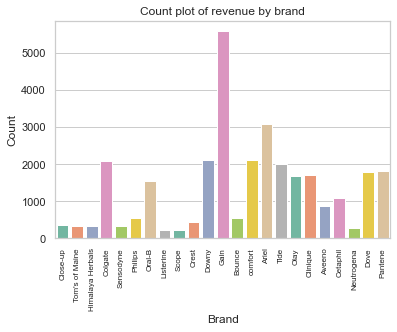

In [17]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Brand", data = pos_data, palette = "Set2")
# Rotate x-axis labels
plt.xticks(fontsize = 8,rotation = 90)  # Specify the rotation angle (in degrees)
plt.xlabel('Brand')
plt.ylabel("Count")
plt.title('Count plot of revenue by brand')
plt.show()

**We can see that *Gain* is the most common brand in the data**

### Part 3.3.4  :  Visualizing proportions

We can use pie charts and donut charts to visualize the proportion or percentage contribution of different components to the total

#### Pie-chart
- A pie chart is a circular chart divided into sectors, where each sector represents a proportion of a whole. 
- Pie charts are often used to visualize how individual parts contribute to the whole and to display the distribution of categorical data as a percentage of the total.

#### What is the proportion of each sector in the sales data?

In [18]:
# group by sector and get the size of each group
df_Sector = pos_data.groupby(['Sector']).size().reset_index()
df_Sector = df_Sector.rename(columns= {0 : "Total"})
df_Sector

,Sector,Total
0,Beauty and Personal Care,9250
1,Fabric Care,15456
2,Oral Care,6351


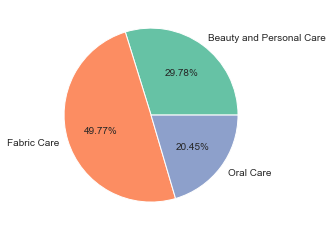

In [19]:
# plot the pie chart
plt.figure(figsize=(6,4))
plt.pie(df_Sector['Total'],labels=df_Sector['Sector'],  \
        autopct='%.2f%%', textprops={'fontsize': 10})
plt.show() 

#### What proportion of revenue is contributed by each category?

In [20]:
# store the labels (category names)
labels = pos_data['Category'].unique().tolist()
labels

['Toothpaste',
 'Toothbrushes',
 'Mouthwash',
 'Fabric Softeners',
 'Laundry Detergents',
 'Skincare',
 'Haircare']

In [21]:
# sizes of the sectors
sizes = [(pos_data[pos_data['Category'] == i]['Revenue($)'].sum()/pos_data['Revenue($)'].sum()) \
         for i in labels ]  
sizes

[0.062474175479750954,
 0.10229585529387808,
 0.04131907114831402,
 0.1722118239636807,
 0.3221899480286048,
 0.18488752843128578,
 0.11462159765448571]

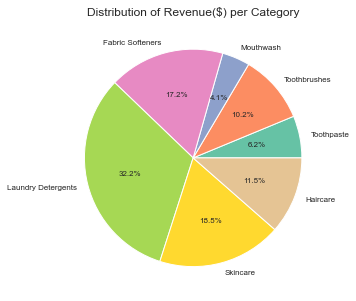

In [22]:
# Create a pie chart
plt.figure(figsize = (5, 5))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',textprops={'fontsize': 8})
plt.xticks(fontsize=8)

# Add title
plt.title("Distribution of Revenue($) per Category")

# Show the plot
plt.show()

**We can see maximum revenue coming from Laundry Detergents**

#### Donut chart
- A donut chart is a variant of the pie chart with a hole (or "donut hole") in the center. 
- Donut charts are used to display data in a circular format, similar to pie charts, but they also allow for the inclusion of additional information within the center hole. 
- Like pie charts, donut charts are used to visualize the distribution of categorical data as a percentage of the total.

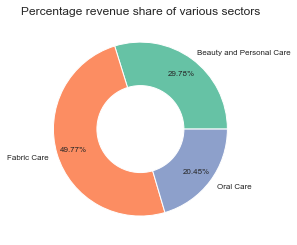

In [23]:
# first draw a pie chart
plt.figure(figsize = (6,4))
plt.pie(df_Sector['Total'], labels = df_Sector['Sector'], autopct = '%.2f%%', \
        pctdistance = 0.8, textprops = {'fontsize': 8})
# then draw a circle centered at (0,0)
centre_circle = plt.Circle((0,0),0.50,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage revenue share of various sectors')
plt.show()